Лабораторная работа №3

Тема: Изучить методы решения систем нелинейных уравнений и особенности их
алгоритмизации в экосистемах языков Python и Rust.

Цель работы: Научиться выбирать методы и алгоритмизировать решение систем нелинейных уравнений
в зависимости от численной ситуации с вниманием к проблемам разрешимости, точности,
численной стабильности и эффективности.

Вариант 3

Индивидуальное задание:
\begin{equation*}
\begin{cases}
3cos(x_1)+x^3_1-x_2=2\\
2e^{-x_1}+x_1-x_2=-1
\end{cases}
\end{equation*}

**Часть первая** \\
Построить график нелинейных функций из системы уравнений и выбрать точки начального приближения для нахождения одного корня, ближайшего к началу координат.

Получено решение: x1 = 1.796760610642914, x2 = 3.12843105884358
Проверка = 0: -1.1281211520497436e-09, -3.76898956488958e-10


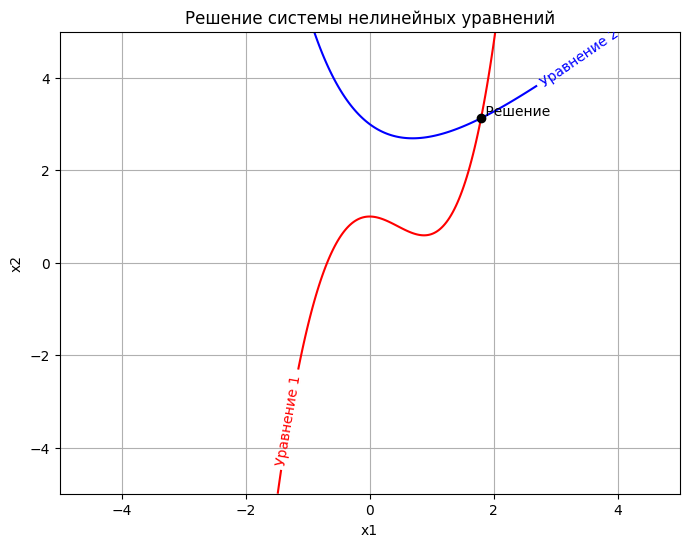

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
def solve_nonlinear_system(initial_guess):

# Решает систему нелинейных уравнений и возвращает решение.
# Параметры:
# initial_guess (list): начальное приближение решения системы уравнений.
# Возвращает:
# solution (np.ndarray): массив с найденным решением системы уравнений.

    solution = fsolve(nonlinear_equations, initial_guess)
    return solution
def nonlinear_equations(variables):

# Определяет систему нелинейных уравнений.
# Параметры:
# variables (list): список переменных системы уравнений (x1, x2).
# Возвращает:
# list: список, содержащий левые части системы нелинейных уравнений.

    x1, x2 = variables
    equation1 = 3*np.cos(x1) + x1**3 - x2 - 2.
    equation2 = 2*np.exp(-x1) + x1 - x2 + 1.
    return [equation1, equation2]
def plot_solution_and_equations(solution):

# Визуализирует систему нелинейных уравнений и точку решения на графике.
# Параметры:
# solution (np.ndarray): решение системы нелинейных уравнений.

    x1_values = np.linspace(-5, 5, 400)
    x2_values = np.linspace(-5, 5, 400)
    X1, X2 = np.meshgrid(x1_values, x2_values)
    Z1 = 3*np.cos(X1) + X1**3 - X2 - 2.
    Z2 = 2*np.exp(-X1) + X1 - X2 + 1.
    plt.figure(figsize=(8, 6))
    contour1 = plt.contour(X1, X2, Z1, levels=[0], colors='r')
    contour2 = plt.contour(X1, X2, Z2, levels=[0], colors='b')
    plt.clabel(contour1, inline=1, fontsize=10, fmt='Уравнение 1')
    plt.clabel(contour2, inline=1, fontsize=10, fmt='Уравнение 2')
    # Точка решения
    plt.plot(solution[0], solution[1], 'ko') # 'ko' означает черный цвет ('k')
    # и форму точки ('o')
    plt.text(solution[0], solution[1], ' Решение', verticalalignment='bottom')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.title('Решение системы нелинейных уравнений')
    plt.grid(True)
    plt.show()

# Начальное приближение для поиска решения
initial_guess = [0., 5.]
# Решение системы нелинейных уравнений
solution = solve_nonlinear_system(initial_guess)
# Проверка решения
solution_check = nonlinear_equations(solution)
print(f"Получено решение: x1 = {solution[0]}, x2 = {solution[1]}")
print(f"Проверка = 0: {solution_check[0]}, {solution_check[1]}")
# Построение графика системы уравнений
plot_solution_and_equations(solution)

**Вторая часть**

In [7]:
# Установка Rust
!curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh -s -- -y
import os
os.environ['PATH'] += ":/root/.cargo/bin"
# Проверка установки Rust
!rustc --version

info: downloading installer
info: profile set to 'default'
info: default host triple is x86_64-unknown-linux-gnu
info: syncing channel updates for 'stable-x86_64-unknown-linux-gnu'
info: latest update on 2024-03-28, rust version 1.77.1 (7cf61ebde 2024-03-27)
info: downloading component 'cargo'
info: downloading component 'clippy'
info: downloading component 'rust-docs'
info: downloading component 'rust-std'
info: downloading component 'rustc'
 60.5 MiB /  60.5 MiB (100 %)  32.4 MiB/s in  2s ETA:  0s
info: downloading component 'rustfmt'
info: installing component 'cargo'
  8.0 MiB /   8.0 MiB (100 %)   3.4 MiB/s in  2s ETA:  0s
info: installing component 'clippy'
info: installing component 'rust-docs'
 14.9 MiB /  14.9 MiB (100 %)   1.2 MiB/s in 12s ETA:  0s
info: installing component 'rust-std'
 26.6 MiB /  26.6 MiB (100 %)   7.4 MiB/s in  3s ETA:  0s
info: installing component 'rustc'
 60.5 MiB /  60.5 MiB (100 %)   9.0 MiB/s in  6s ETA:  0s
info: installing component 'rustfmt'
info:

На языке Rust решить системы нелинейных уравнений по методу Ньютона.

In [8]:
%%writefile lab3_newton.rs

use std::f64;

// Функция для проверки равенства нулю с учетом погрешности
fn is_zero(n: f64, eps: f64) -> bool {
    n.abs() < eps
}

// Функция для вычисления обратной матрицы 2x2
fn inverse_matrix_2x2(matrix: [[f64; 2]; 2], epsilon: f64) -> Result<[[f64; 2]; 2], &'static str> {
    let det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0];
    if is_zero(det, epsilon) {
        return Err("Матрица является вырожденной и не имеет обратной.");
    }
    let inv_matrix = [
        [ matrix[1][1] / det, -matrix[0][1] / det],
        [-matrix[1][0] / det,  matrix[0][0] / det]
    ];
    Ok(inv_matrix)
}

// Функция умножения матрицы на вектор
fn matrix_vector_multiply(matrix: [[f64; 2]; 2], vector: [f64; 2]) -> [f64; 2] {
    [
        matrix[0][0] * vector[0] + matrix[0][1] * vector[1],
        matrix[1][0] * vector[0] + matrix[1][1] * vector[1],
    ]
}

fn f(x: [f64; 2]) -> [f64; 2] {
    [3. * x[0].cos() + x[0].powi(3) - x[1] - 2.,
     2. * f64::exp(-x[0]) + x[0] - x[1] + 1.]
}

// Функция для задания Якобиана
fn jacobian(x: [f64; 2]) -> [[f64; 2]; 2] {
    [
        [-3. * x[0].sin() + 3. * x[0].powi(2), -1.],
        [-2. * f64::exp(-x[0]) + 1., -1.]
    ]
}


// Бесконечная норма
fn norm(vector: [f64; 2]) -> f64 {
    vector.iter().map(|&v| v.abs()).fold(0., f64::max)
}

// Метод Ньютона
fn newton_method(f: fn([f64; 2]) -> [f64; 2], jacobian: fn([f64; 2]) -> [[f64; 2]; 2], initial_guess: [f64; 2], epsilon: f64, max_iterations: usize) -> Result<[f64; 2], &'static str> {
    let mut x = initial_guess;
    for _ in 0..max_iterations {
        let j = jacobian(x);
        let inv_j = inverse_matrix_2x2(j, epsilon)?;
        let fx = f(x);
        let delta = matrix_vector_multiply(inv_j, [-fx[0], -fx[1]]);
        x = [x[0] + delta[0], x[1] + delta[1]];

        if norm(delta) < epsilon {
            return Ok(x);
        }
    }
    Err("Алгоритм не сошелся")
}

fn main() {
    let epsilon = 1e-6; // Задаем значение epsilon
    let initial_guess = [0., 5.];
    match newton_method(f, jacobian, initial_guess, epsilon, 100) {
        Ok(solution) => println!("Решение: {:?}", solution),
        Err(e) => println!("{}", e),
    }
}


Writing lab3_newton.rs


Компиляция и запуск:

In [9]:
# Компиляция
!rustc lab3_newton.rs

# Запуск скомпилированной программы
!./lab3_newton

Решение: [1.7967606107664955, 3.128431058549222]


**Третья часть** \\
Написать и отладить две программы на языке Rust для решения по методу простой итерации и по методу градиентного спуска. \\

Программа по методу итераций.

In [40]:
%%writefile lab3_iteration.rs

fn get_fx(x: f64) -> f64 {
    // 3cos(x1) + x1^3 - x2 = 2
    3. * f64::cos(x) + x.powi(3) - 2.
}

fn main() {
    let epsilon = 0.000000001;
    let mut prev = 0.;
    let x2 = loop {
        let new_x = get_fx(prev);

        if (new_x - prev).abs() < epsilon {
            break new_x;
        }

        prev = new_x;
    };

    // 2e^(-x1) + x1 - x2 = -1
    let x1 = -f64::ln((-x2 + 1.) / 2.);

    println!("Ответ: x1: {x1}; x2: {x2}");
}

Overwriting lab3_iteration.rs


Компиляция и запуск:

In [41]:
# Компиляция
!rustc lab3_iteration.rs

# Запуск скомпилированной программы
!./lab3_iteration

Ответ: x1: 1.7671224278886877; x2: 0.6583523196498748


Программа по методу градиентного спуска.

In [30]:
%%writefile lab3_gradient_descent.rs

fn get_residual(x1: f64, x2: f64) -> f64 {
    (3. * f64::cos(x1) + x1.powi(3) - x2 - 2.).powi(2) + (2. * f64::exp(- x1) + x1 - x2 + 1.).powi(2)
}

fn get_residual_x1(x1: f64, x2: f64) -> f64 {
    2. * ((3. * f64::cos(x1) + (x1).powi(3) - x2 -2.) * (-3. * f64::sin(x1) + (3. * (x1).powi(2)) + (2. * f64::exp(-x1) + x1 -x2 + 1.) * (-2. * f64::exp(-x1) - (x1 * f64::exp(-x1) + 1.))))
}

fn get_residual_x2(x1: f64, x2: f64) -> f64 {
    -2. * ((3. * f64::cos(x1) + (x1).powi(3) - x2 - 2.) + (2. * f64::exp(-x1) +x1 - x2 + 1.))
}

fn main() {
    let learning_speed = 0.000001;
    let epsilon = 0.000000001;

    let mut x1 = 0.;
    let mut x2 = 5.;

    while get_residual(x1, x2) > epsilon {
        (x1, x2) = (x1 - learning_speed * get_residual_x1(x1, x2), x2 - learning_speed * get_residual_x2(x1, x2));
    }

    println!("Ответ: x1: {x1}; x2: {x2}");
}


Overwriting lab3_gradient_descent.rs


Компиляция и запуск:

In [31]:
# Компиляция
!rustc lab3_gradient_descent.rs

# Запуск скомпилированной программы
!./lab3_gradient_descent

Ответ: x1: 1.7967659127329576; x2: 3.1284662172212276


Таблица:

In [ ]:
tabledata = [["Ньютон Python", "x1 = 1.796760610642914", "x2 = 3.12843105884358"],
         ["Ньютон Rust", "x1 = 1.7967606107664955", "x2 = 3.128431058549222"],
         ["Итерация", "x1 = 1.7671224278886877", "x2 = 0.6583523196498748"],
         ["Градиентный спуск", "x1 = 1.7967659127329576", "x2 = 3.1284662172212276"]]
tabledata

import pandas as pd
from IPython.display import HTML, display
from tabulate import tabulate
display(HTML(tabulate(tabledata, tablefmt='html')))

Ньютон Python,x1 = 1.796760610642914,x2 = 3.12843105884358
Ньютон Rust,x1 = 1.7967606107664955,x2 = 3.128431058549222
Итерация,x1 = 1.7671224278886877,x2 = 0.6583523196498748
Градиентный спуск,x1 = 1.7967659127329576,x2 = 3.1284662172212276


**Вывод:** на этой лабораторной работе научились выбирать методы и алгоритмизировать решение систем нелинейных уравнений в зависимости от численной ситуации с вниманием к проблемам разрешимости, точности, численной стабильности и эффективности.